### Data preprocessing

source: https://www.kaggle.com/datasets/mrmorj/big-mart-sales

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("train_v9rqX0R.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.drop(columns=['Outlet_Establishment_Year', 'Outlet_Size', 'Item_Outlet_Sales'], inplace=True)

In [4]:
category_cols = [col for col in df.columns if df[col].dtype == 'O']
for col in category_cols:
    df[col] = df[col].astype('category')

In [5]:
df.dtypes

Item_Identifier         category
Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Location_Type    category
Outlet_Type             category
dtype: object

In [6]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,Tier 3,Supermarket Type1


### Data analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,7060.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782
std,4.643456,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,8.773750,0.026989,93.826500
50%,12.600000,0.053931,143.012800
75%,16.850000,0.094585,185.643700
max,21.350000,0.328391,266.888400


In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

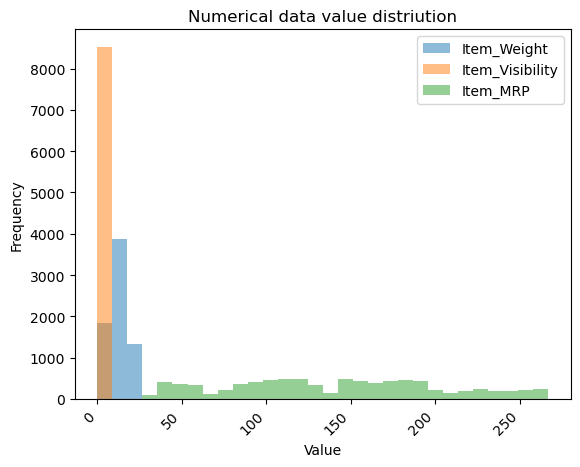

In [10]:
df.iloc[:, 1:-3].plot(kind='hist', bins=30,alpha=0.5)
plt.xticks(rotation=45,ha='right')
plt.title('Numerical data value distriution')
plt.xlabel("Value")
plt.show()

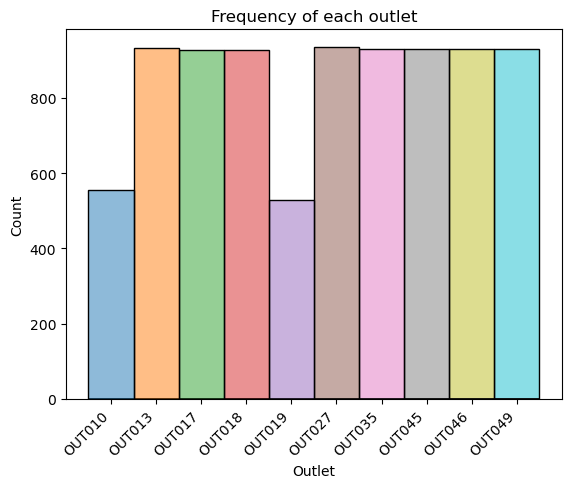

In [11]:
sns.histplot(df, x='Outlet_Identifier', hue='Outlet_Identifier', legend="")
plt.xticks(rotation=45,ha='right')
plt.title('Frequency of each outlet')
plt.xlabel("Outlet")
plt.show()

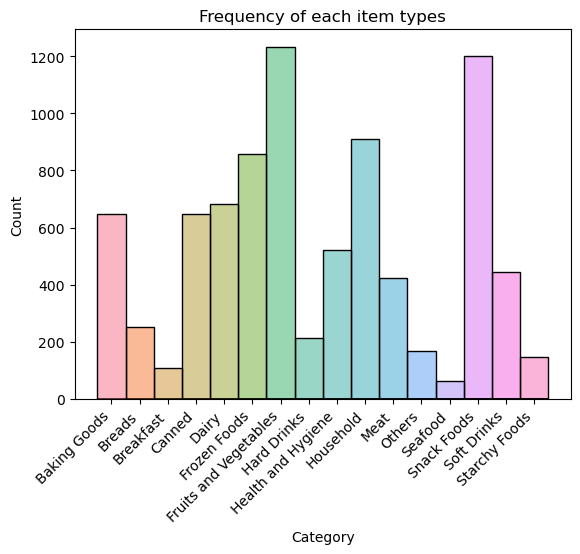

In [12]:
sns.histplot(df, x='Item_Type', hue='Item_Type', legend="")
plt.title('Frequency of each item types')
plt.xticks(rotation=45,ha='right')
plt.xlabel("Category")
plt.show()

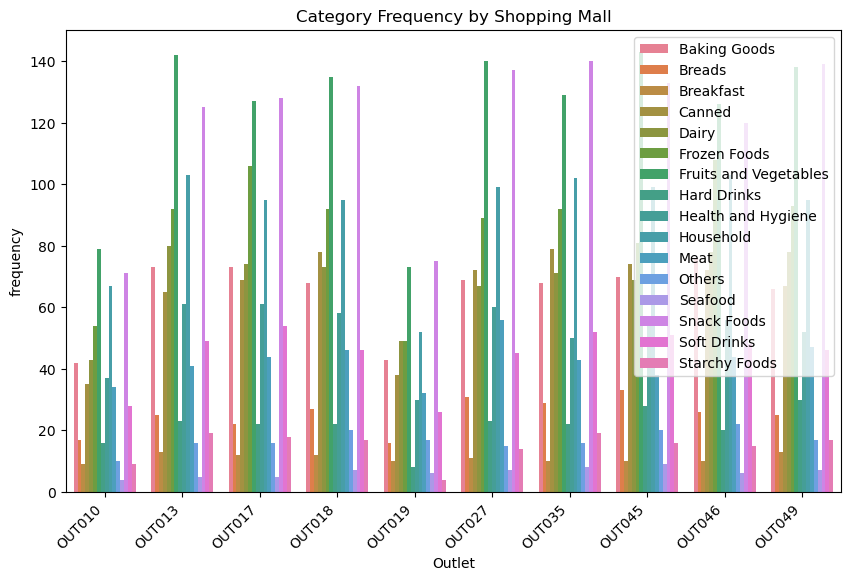

In [13]:
by_mall = df.groupby(['Outlet_Identifier', 'Item_Type'], observed=True).size()
by_mall = by_mall.reset_index(name='frequency')


plt.figure(figsize=(10, 6))
sns.barplot(data=by_mall, x='Outlet_Identifier', y='frequency', hue='Item_Type')
plt.title('Category Frequency by Shopping Mall')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Outlet")
plt.legend(loc="upper right")
plt.show()


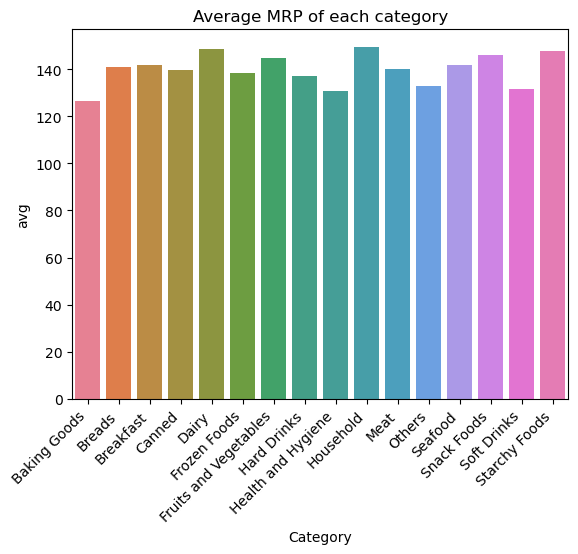

In [14]:
price_by_category = df.groupby('Item_Type', observed=True)['Item_MRP'].mean().reset_index(name="avg")
sns.barplot(price_by_category, x='Item_Type', y='avg', hue='Item_Type')
plt.title('Average MRP of each category')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.show()

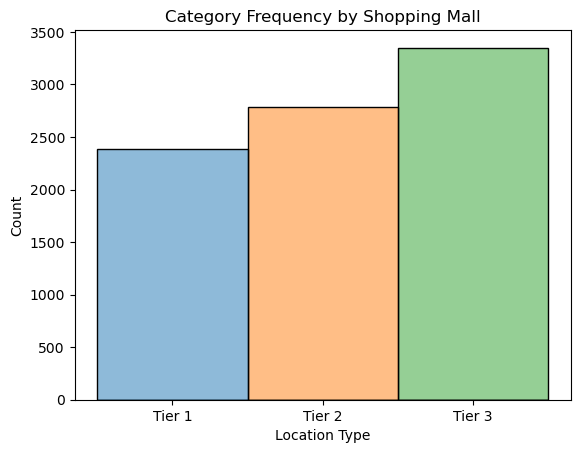

In [15]:
sns.histplot(df, x='Outlet_Location_Type', hue='Outlet_Location_Type', legend="")
plt.title('Category Frequency by Shopping Mall')
plt.xlabel("Location Type")
plt.show()